In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification

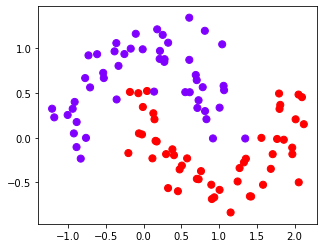

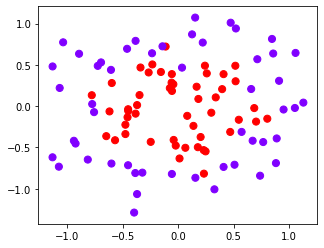

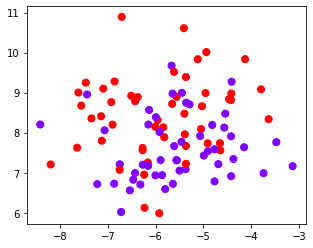

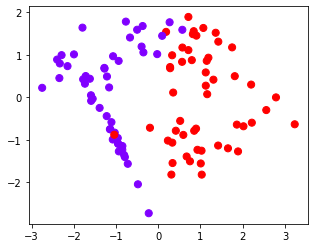

In [2]:
n_samples = 100
datas = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features =
2,n_informative=2,n_redundant=0, random_state=5)
 ]
Kernel = ["linear","poly","rbf","sigmoid"]
#四个数据集分别是什么样子呢？
for X,Y in datas:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

/A/develop/ide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: UserWarning: No contour levels were found within the data range.


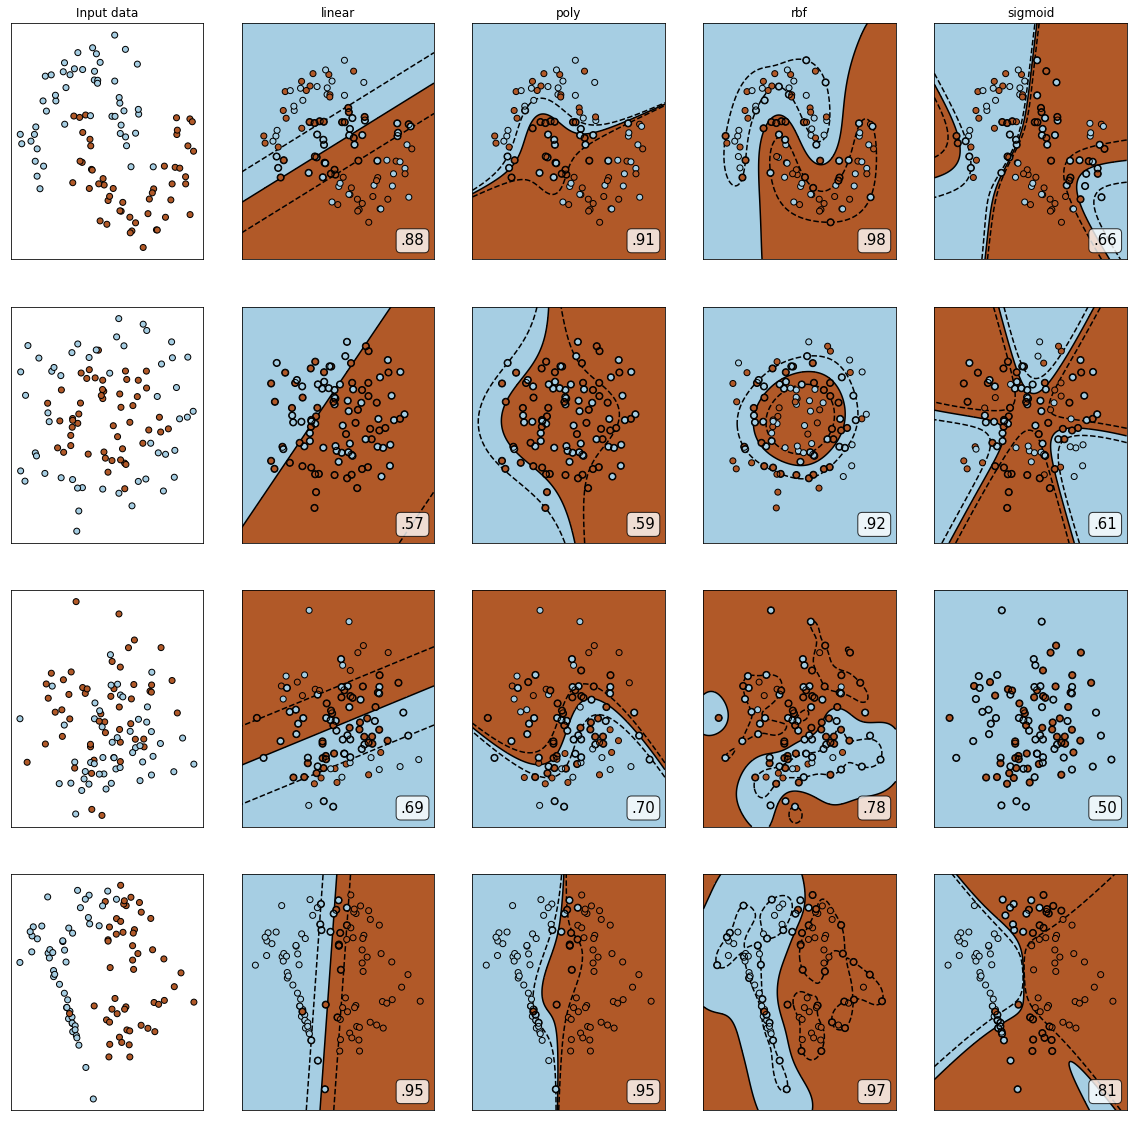

In [3]:
# 3. 构建子图
rows = len(datas)
cols = len(Kernel)+1
fig,axes = plt.subplots(rows,cols,figsize=(rows*5,cols*4))
# 开始进行子图循环
for i, (X,y) in enumerate(datas):
    # 在图像中的第一列, 放置原数据的分布
    ax = axes[i,0]
    if i == 0:
        ax.set_title('Input data')
    ax.scatter(
        X[:,0]
        ,X[:,1]
        ,c=y
        ,zorder=10# 覆盖等级
        ,cmap=plt.cm.Paired
        ,edgecolors='k'
    )
    # 没有标尺
    ax.set_xticks(())
    ax.set_yticks(())
    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for k_idx, kernel in enumerate(Kernel):
        #定义子图位置
        ax = axes[i, k_idx + 1]
        #建模
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)
        score = clf.score(X ,y)
        # 绘制图像本身分布的散点图
        ax.scatter(
            X[:, 0]
            , X[:, 1]
            , c=Y
            , zorder=10
            , cmap=plt.cm.Paired
            , edgecolors='k'
        )
        #绘制支持向量
        ax.scatter(
            clf.support_vectors_[:, 0], clf.support_vectors_[:, 1]
            , s=50
            , facecolors='none'
            , zorder=11
            , edgecolors='k'
        )
        
        #绘制决策边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        
        # 填充等高线不同区域的颜色
        ax.pcolormesh(
            XX
            , YY
            , Z > 0 # Z>0和小于0分别填充不同颜色
            , cmap=plt.cm.Paired
        )
        # 绘制等高线
        ax.contour(
            XX
            , YY
            , Z
            , colors=['k', 'k', 'k']
            , linestyles=['--', '-', '--']
            , levels=[-1, 0, 1]
        )
        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())
        
        #将标题放在第一行的顶上
        if i == 0:
            ax.set_title(kernel)
        #为每张图添加分类的分数  
        ax.text(0.95, 0.06
               , ('%.2f' % score).lstrip('0')
               , size=15
               , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
               #为分数添加一个白色的格子作为底色
               , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
               , horizontalalignment='right' #位于坐标轴的什么方向
               )

#plt.tight_layout()
plt.show()